# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
api_key = '45ca41611bbfc0345e2099e87b062e17'

url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

In [49]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

 
record = 1

# Print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    

    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        record= record + 1
        
        time.sleep(1)
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45ca41611bbfc0345e2099e87b062e17&q=hermanus
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45ca41611bbfc0345e2099e87b062e17&q=ushuaia
Processing Record 3 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45ca41611bbfc0345e2099e87b062e17&q=dikson
Processing Record 4 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45ca41611bbfc0345e2099e87b062e17&q=kavieng
Processing Record 5 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45ca41611bbfc0345e2099e87b062e17&q=mahebourg
Processing Record 6 | Ongandjera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45ca41611bbfc0345e2099e87b062e17&q=ongandjera
Processing Record 7 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?uni

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weatherdata = pd.DataFrame(weather_dict)

weatherdata.count()

#weatherdata.to_csv('../Output/weatherdata.csv')

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [55]:
weatherdata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,80,ZA,1554325290,77,-34.42,19.24,61.00,2.93
1,Ushuaia,75,AR,1554321600,75,-54.81,-68.31,46.40,34.45
2,Dikson,76,RU,1554325922,100,73.51,80.55,23.58,16.02
3,Kavieng,100,PG,1554325923,100,-2.57,150.80,80.10,7.18
4,Mahebourg,75,MU,1554325744,88,-20.41,57.70,78.80,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

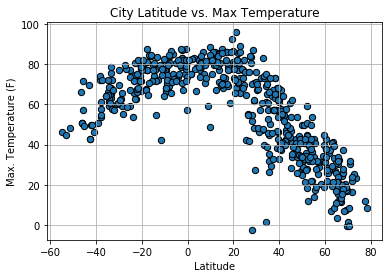

In [62]:
# Build a scatter plot
plt.scatter(weatherdata["Lat"], weatherdata["Max Temp"], marker="o", edgecolors="black", s=40)

# Label plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("../Output/LatvsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

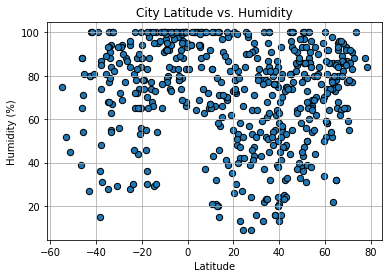

In [63]:
# Build a scatter plot
plt.scatter(weatherdata["Lat"], weatherdata["Humidity"], edgecolors="black", s=40)

# Label plot
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("../Output/LatvsHum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

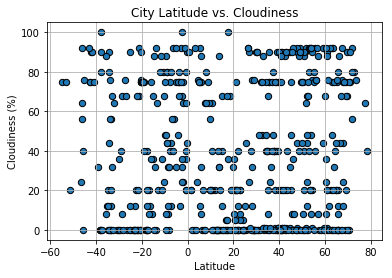

In [64]:
# Build a scatter plot
plt.scatter(weatherdata["Lat"], weatherdata["Cloudiness"], edgecolors="black", s=40)

# Label plot
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("../Output/LatvsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

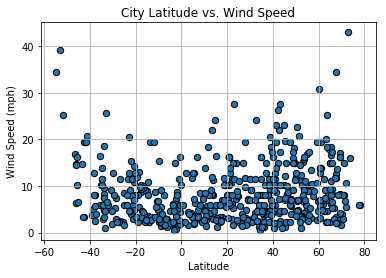

In [65]:
# Build a scatter plot
plt.scatter(weatherdata["Lat"], weatherdata["Wind Speed"], marker="o", edgecolors="black", s=40)

# Label plot
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("../Output/LatvsWind.png")

# Show plot
plt.show()